<a href="https://colab.research.google.com/github/upeast/Lee2/blob/main/9%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")


x = train_df.iloc[:, 1:].values
y = train_df.iloc[:, 0].values


x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=42
)


print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)
print("test_data:", test_df.shape)

x_train: (33600, 784)
y_train: (33600,)
x_val: (8400, 784)
y_val: (8400,)
test_data: (28000, 784)


1번

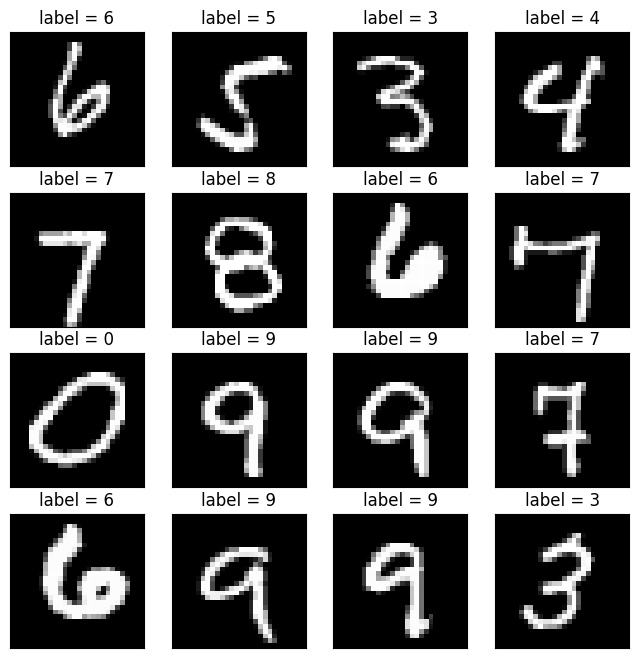

In [54]:
import matplotlib.pyplot as plt

# 4x4 subplot 생성
fig, ax = plt.subplots(4, 4, figsize=(8, 8))

# 16개 샘플 이미지 출력
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(x_train[index].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('label = %s' % (y_train[index]))
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

2번

In [55]:
x_train = x_train / 255.0
x_val = x_val / 255.0
test_df = test_df / 255.0

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    solver='lbfgs',
    max_iter=500,
    tol=0.001
)

clf.fit(x_train, y_train)

LogisticRegression(max_iter=500, tol=0.001)

3번

In [56]:
from sklearn.metrics import accuracy_score
y_val_pred = clf.predict(x_val)

print("Model accuracy is %0.3f" % (accuracy_score(y_val, y_val_pred)))


Model accuracy is 0.919


4번

Correctly predicted images:


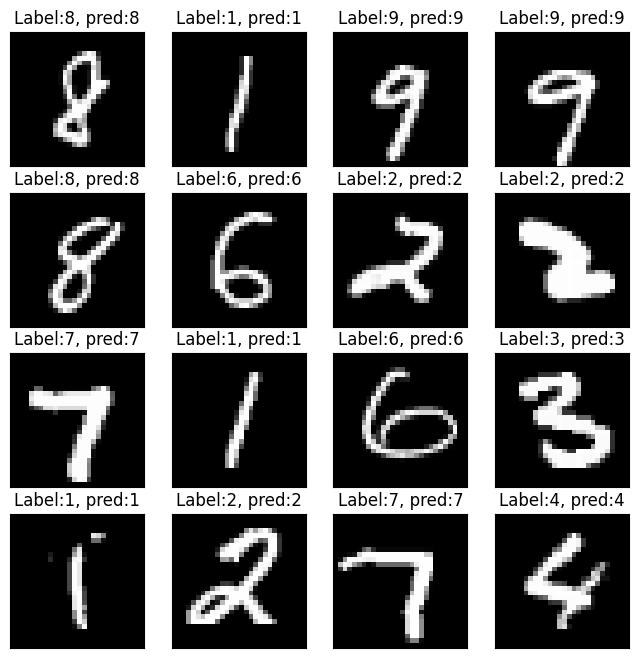

In [57]:
print("Correctly predicted images:")
x_val_correct = x_val[y_val == y_val_pred, :]
y_val_correct = y_val[y_val == y_val_pred]
y_val_pred_correct = y_val_pred[y_val == y_val_pred]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_correct[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label:{y_val_correct[idx]}, pred:{y_val_pred_correct[idx]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

5번

In [58]:
print("Incorrectly predicted images:")

x_val_incorrect = x_val[y_val != y_val_pred, :]
y_val_incorrect = y_val[y_val != y_val_pred]
y_val_pred_incorrect = y_val_pred[y_val != y_val_pred]


Incorrectly predicted images:


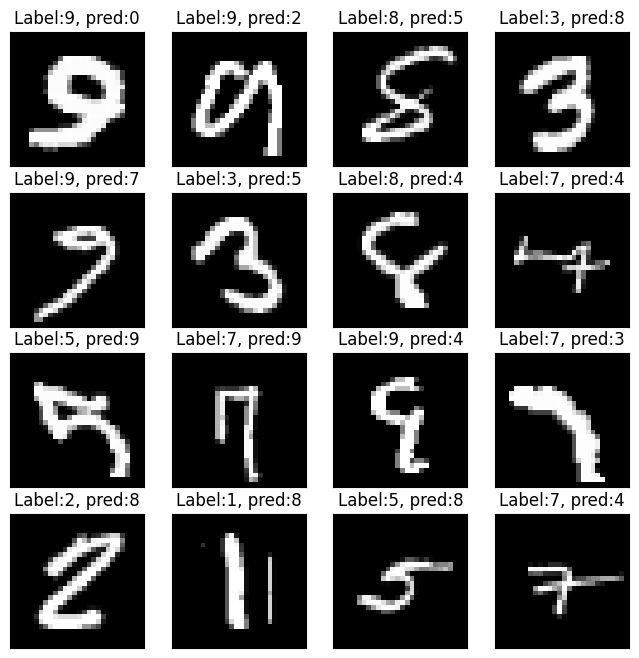

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        ax[i, j].imshow(x_val_incorrect[idx].reshape(28, 28), cmap='gray')
        ax[i, j].set_title(f"Label:{y_val_incorrect[idx]}, pred:{y_val_pred_incorrect[idx]}")
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

6번

In [60]:
preds = clf.predict(x_test)

7번

In [61]:
import pandas as pd

# 1. sample_submission.csv 불러오기
sample_submission = pd.read_csv("/content/sample_submission.csv")

# 2. 예측 결과 넣기
sample_submission['Label'] = preds

# 3. 제출용 CSV로 저장
sample_submission.to_csv("/content/sample_submission.csv", index=False)